Session 2 notebook

In [143]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tld import get_tld
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [144]:
df = pd.read_csv('Phishing_Mitre_Dataset_Summer_of_AI.csv')

In [145]:
#create URL features

def entropy(url_string):
        string = url_string.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return abs(entropy)
    
def has_www(url_string):
    if (url_string.find('www.') == -1):
        return 0
    else:
        return 1
    
df['url_length'] = df['URL'].apply(len)
df['url_entropy'] = df['URL'].apply(entropy)
df['3rd_level_domain'] = df['URL'].apply(has_www)

df['count_non_alpha_full'] = df['URL'].str.findall(r'[^a-zA-Z]').str.len() / df['url_length']


In [146]:
df.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,0,0.457143
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,1,0.250000
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,0,0.479452
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,0,0.258065
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,0,0.258065


(array([4.475e+03, 2.370e+02, 4.300e+01, 1.100e+01, 5.000e+00, 1.300e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-115. ,  892.4, 1899.8, 2907.2, 3914.6, 4922. , 5929.4, 6936.8,
        7944.2, 8951.6, 9959. ]),
 <BarContainer object of 10 artists>)

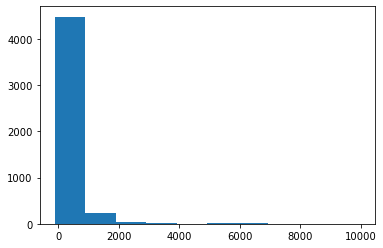

In [147]:
plt.hist(df['update_age(days)'])

In [148]:
df.shape

(4799, 9)

In [149]:
#imputer

df['create_age(months)'][df['create_age(months)']<0]=np.nan
df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
df['update_age(days)'][df['update_age(days)']<0]=np.nan

df_dropped = df.dropna()

df_impute = df.copy()

df_impute['create_age(months)'].fillna((df_impute['create_age(months)'].mean()),inplace=True)
df_impute['expiry_age(months)'].fillna((df_impute['expiry_age(months)'].mean()),inplace=True)
df_impute['update_age(days)'].fillna((df_impute['update_age(days)'].mean()),inplace=True)

<ipython-input-149-d9a4c77fcb38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_age(months)'][df['create_age(months)']<0]=np.nan
<ipython-input-149-d9a4c77fcb38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
<ipython-input-149-d9a4c77fcb38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['update_age(days)'][df['update_age(days)']<0]=np.nan


In [150]:
df_dropped.shape

(3263, 9)

In [151]:
#dropped df models
X = df_dropped[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_dropped['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9263157894736842

In [153]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1_score(y_test, y_pred)

0.9219858156028369

In [154]:
DTC = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DTC.predict(X_test)
f1_score(y_test, y_pred)

0.9280575539568345

In [155]:
GNB = GaussianNB().fit(X_train, y_train)
y_pred = GNB.predict(X_test)
f1_score(y_test, y_pred)

0.9084628670120899

In [156]:
SVMC = svm.SVC().fit(X_train, y_train)
y_pred = SVMC.predict(X_test)
f1_score(y_test, y_pred)

0.884476534296029

In [157]:
RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = RF.predict(X_test)
f1_score(y_test, y_pred)

0.8761220825852785

In [158]:
ADA = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred = ADA.predict(X_test)
f1_score(y_test, y_pred)

0.9449378330373002

In [159]:
#imputed df models

In [160]:
#dropped df models
X = df_impute[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_impute['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9050051072522983

In [162]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1_score(y_test, y_pred)

0.8988988988988988

In [163]:
DTC = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DTC.predict(X_test)
f1_score(y_test, y_pred)

0.9016393442622951

In [164]:
GNB = GaussianNB().fit(X_train, y_train)
y_pred = GNB.predict(X_test)
f1_score(y_test, y_pred)

0.9034205231388329

In [165]:
SVMC = svm.SVC().fit(X_train, y_train)
y_pred = SVMC.predict(X_test)
f1_score(y_test, y_pred)

0.8866799204771372

In [166]:
RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = RF.predict(X_test)
f1_score(y_test, y_pred)

0.888663967611336

In [167]:
ADA = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred = ADA.predict(X_test)
f1_score(y_test, y_pred)

0.9274770173646578